In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import wrangle


In [2]:
# acquire data
zillow_data = wrangle.get_zillow17_data()

Let me get that for you...


In [3]:

zillow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77381 non-null  int64  
 1   id                            77381 non-null  int64  
 2   parcelid                      77381 non-null  int64  
 3   airconditioningtypeid         24953 non-null  float64
 4   architecturalstyletypeid      206 non-null    float64
 5   basementsqft                  50 non-null     float64
 6   bathroomcnt                   77381 non-null  float64
 7   bedroomcnt                    77381 non-null  float64
 8   buildingclasstypeid           15 non-null     float64
 9   buildingqualitytypeid         49672 non-null  float64
 10  calculatedbathnbr             76772 non-null  float64
 11  decktypeid                    614 non-null    float64
 12  finishedfloor1squarefeet      6023 non-null   float64
 13  c

Take aways:
- pulled all tables from the database
- aproximatly 77,381 rows of data
- ensured no duplicates based on parcelid and trasaction date


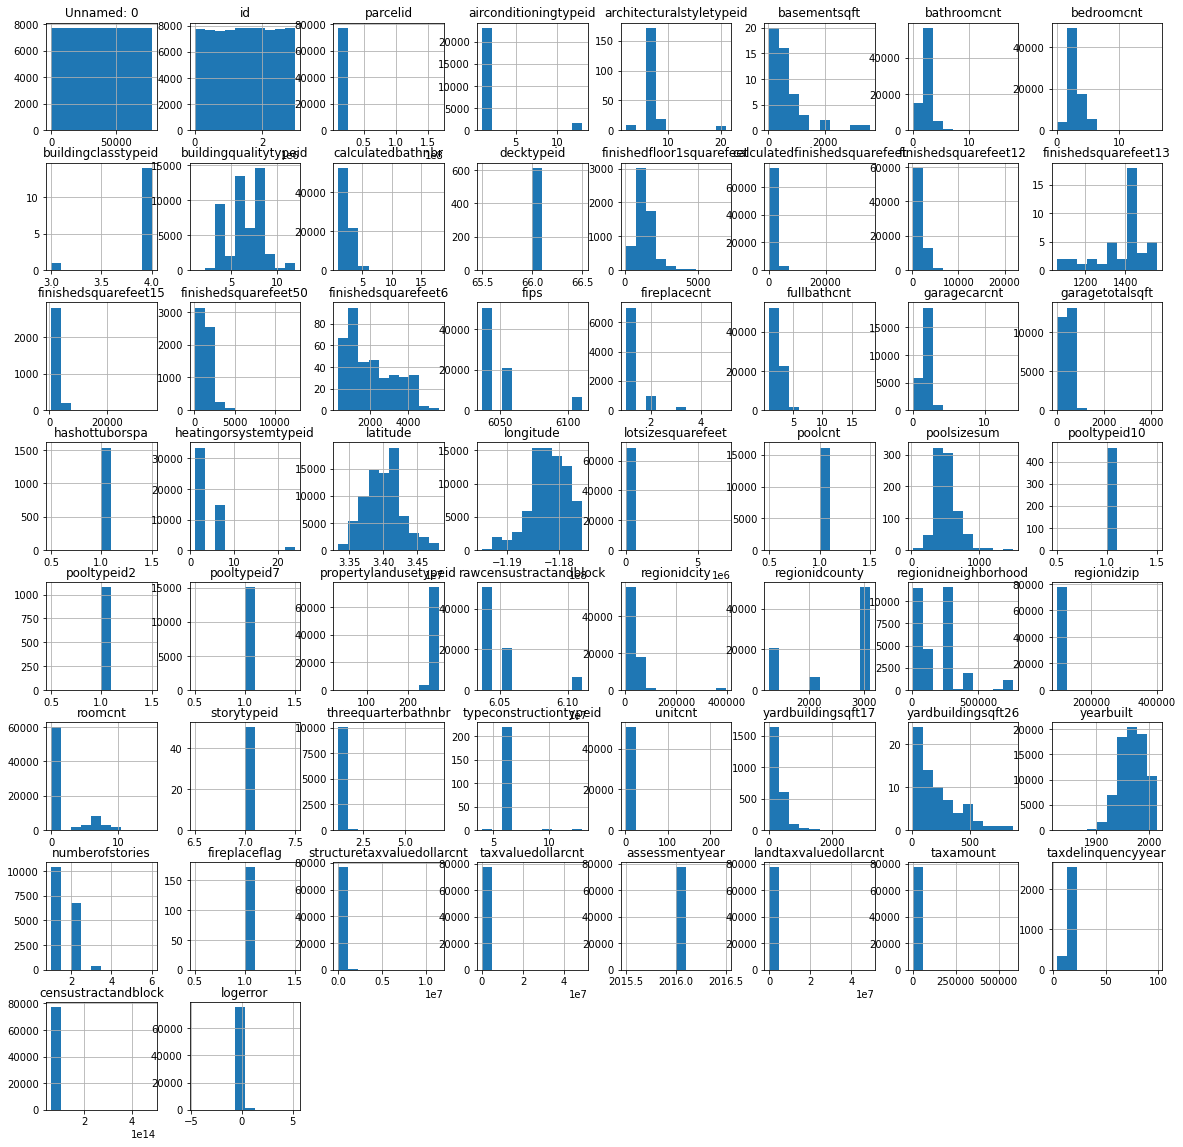

In [4]:
# outlier investigation
zillow_data.hist(figsize=(20,20))
plt.show()

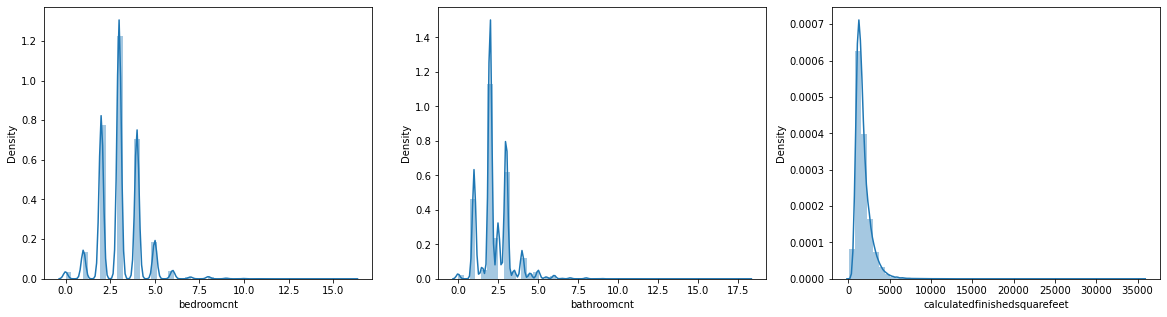

In [5]:
# Histogram of bedroomcnt, bathroomcnt, and calculatedsqft
fig, ax = plt.subplots(1, 3, figsize=(20,5))
sns.distplot(zillow_data.bedroomcnt, ax=ax[0])
sns.distplot(zillow_data.bathroomcnt, ax=ax[1])
sns.distplot(zillow_data.calculatedfinishedsquarefeet, ax=ax[2])
plt.show()

Bedroomcnt, bathroomcnt, and calculated_finishedsquarefeet are where i decided to remove outliers

In [6]:
# prep data
zillow = wrangle.prepare_zillow(zillow_data)

In [7]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67665 entries, 0 to 77380
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            67665 non-null  int64  
 1   parcelid                      67665 non-null  int64  
 2   bathroomcnt                   67665 non-null  float64
 3   bedroomcnt                    67665 non-null  float64
 4   calculatedfinishedsquarefeet  67665 non-null  float64
 5   fips                          67665 non-null  float64
 6   fullbathcnt                   67665 non-null  float64
 7   latitude                      67665 non-null  float64
 8   longitude                     67665 non-null  float64
 9   lotsizesquarefeet             67665 non-null  float64
 10  propertylandusetypeid         67665 non-null  float64
 11  rawcensustractandblock        67665 non-null  float64
 12  regionidcity                  67665 non-null  float64
 13  r

In [8]:
zillow

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,county
0,1727539,14297519,3.5,4.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential,Orange
1,1387261,17052889,1.0,2.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential,Ventura
2,11677,14186244,2.0,3.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential,Orange
3,2288172,12177905,3.0,4.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,Los Angeles
4,1970746,10887214,3.0,3.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,278581.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Condominium,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,673515,11000655,2.0,2.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,47405.0,...,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Single Family Residential,Los Angeles
77377,2968375,17239384,2.0,4.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,12105.0,...,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,Single Family Residential,Ventura
77378,1843709,12773139,1.0,3.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,5074.0,...,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Single Family Residential,Los Angeles
77379,1187175,12826780,2.0,3.0,1762.0,6037.0,2.0,33937685.0,-117996709.0,6347.0,...,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,Single Family Residential,Los Angeles


Take aways:
- Home types include 'Single Family', 'Mobile', 'Manufactured', 'Townhouse', 'Cluster', and 'Condominium' 
- outliers were removed from 'calculatedfinishedsquarefeet', 'bedroomcnt', and 'bathroomcnt'
- missing values were handled by removing all columns and rows that had more than 50% missing values.
- Columns dropped were 'heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc', 'Unnamed: 0'
- impute missing values useing the most frequent value in 'calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', and 'censustractandblock'.
- impute missing values using median in 'finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', and 'taxamount'.
- created county column using fips
- only select properties with atleast 1 bedroom, 1 bathroom, and 500 sqft
- 67665 rows of data
- 12.8% data loss...acceptable

In [9]:
# feature engineering
zillow = wrangle.feature_engineering(zillow)

In [10]:

zillow.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,transactiondate,propertylandusedesc,county,sqft_per_bed,sqft_per_bath,total_rooms,bed_bath_rooms_per_sqft,age_in_years,taxrate,dollars_per_sqft
0,1727539,14297519,3.5,4.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,...,2017-01-01,Single Family Residential,Orange,775.000000,885.714286,7.5,0.002419,19.0,0.010763,330.090968
1,1387261,17052889,1.0,2.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,...,2017-01-01,Single Family Residential,Ventura,732.500000,1465.000000,3.0,0.002048,50.0,0.012225,316.723549
2,11677,14186244,2.0,3.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,...,2017-01-01,Single Family Residential,Orange,414.333333,621.500000,5.0,0.004023,55.0,0.011488,454.366854
3,2288172,12177905,3.0,4.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,...,2017-01-01,Single Family Residential,Los Angeles,594.000000,792.000000,7.0,0.002946,47.0,0.012247,61.087121
4,1970746,10887214,3.0,3.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,278581.0,...,2017-01-01,Condominium,Los Angeles,437.333333,437.333333,6.0,0.004573,53.0,0.012846,91.011433


Take aways:
- created new columns for sqft per bed and bath
- new column beds + baths = total rooms
- created new column for sqft per room
- created new column for age of property
- created new column for tax rate
- created new column for tax amount per sqft


Target Variable: logerror

Initial Questions:
- What is the distribution of each variable?
- Does the logerror differ by home age?
- Does the logerror differ by tax rate?
- Does the logerror differ by tax amount per sqft?
- Does the logerror differ by location?
- Is there a relationship between the logerror and amount of rooms?
- Is there a relationship between the logerror and age of property?
- Is there a relationship between the logerror and tax rate?
- If we control for age, does the logerror differ by location?
- If we control for tax rate, does the logerror differ by location?
- If we control for cost per sqft, does the logerror differ by location?
- If we control for location, does the logerror differ by age?
- If we control for location, does the logerror differ by tax rate?

In [11]:
# split data
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_zillow(zillow, 'logerror')

In [12]:
# check splits
print(train.shape)
print(validate.shape)
print(test.shape)

(37892, 34)
(16240, 34)
(13533, 34)


In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)
print(X_test.shape)
print(y_test.shape)

(37892, 33)
(37892, 1)
(16240, 33)
(16240, 1)
(13533, 33)
(13533, 1)


In [14]:
# numerical columns to scale
num_cols = ['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fullbathcnt', 'latitude',
       'longitude', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'taxamount','sqft_per_bed', 'sqft_per_bath',
       'total_rooms', 'bed_bath_rooms_per_sqft', 'age_in_years', 'taxrate',
       'dollars_per_sqft']


In [15]:
X_train = X_train[num_cols]
X_validate = X_validate[num_cols]
X_test = X_test[num_cols]

In [16]:
# scale X data
X_train_scaled = wrangle.scale_minmax(X_train)
X_validate_scaled = wrangle.scale_minmax(X_validate)
X_test_scaled = wrangle.scale_minmax(X_test)

Take aways:
- Data was split into train(75%), validate(15%), and test(10%)
- Target(y) varible is 'logerror'
- Features(X) are all except 'logerror'
- All shapes are valid
- Selected features to scale and scaled Xs'

Exploration

In [17]:

# check the distribution of each variable thats is not and object or str
# for col in X_train.columns:
#     if X_train[col].dtype != 'object' and X_train[col].dtype != 'str':
#         sns.set_style("darkgrid")
#         plt.figure(figsize=(4,2))
#         sns.displot(X_train[col], bins=20, kde=True, color='purple')
#         plt.show()
    

Take Aways:
- Calculatedsquarefeet has a normal distribution
- Skew right = dollars_per_sqft, age_in_year, total_rooms, sqft_per_bath, sqft_per_room, latitude: (use spearmans correlation test in linear relationships)
- Skew left = longitude and year_built

<Figure size 288x144 with 0 Axes>

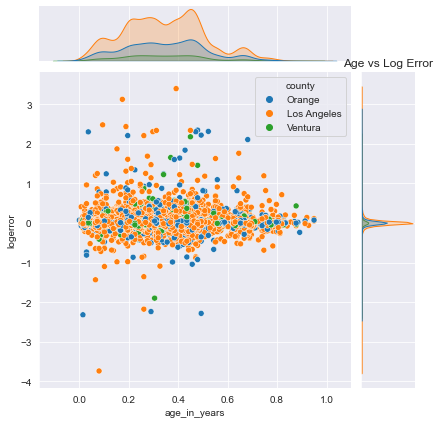

In [18]:
#Answer questions
# Does the logerror differ by home age? 
# plot age_in_years vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['age_in_years'], y='logerror', data=train, hue='county')
# lable the plot
plt.xlabel('Age in Years')
plt.ylabel('Log Error')
plt.title('Age vs Log Error')
plt.show()

<Figure size 288x144 with 0 Axes>

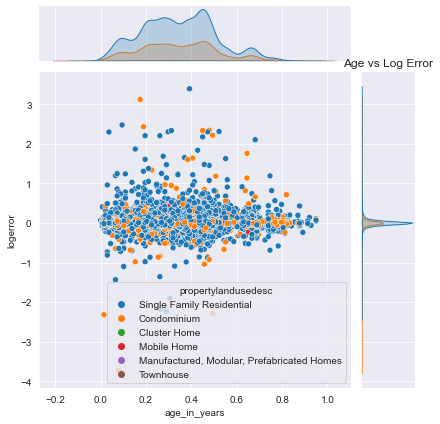

In [19]:
# Does the logerror differ by home age?
# plot age_in_years vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['age_in_years'], y=y_train['logerror'], data=train, hue='propertylandusedesc')
# lable the plot
plt.xlabel('Age in Years')
plt.ylabel('Log Error')
plt.title('Age vs Log Error')
plt.show()

Take aways:
- There seems to be a greater logerror for newer homes specifically in orange county and ventura.
- LA county seems to have to most constistent logerror through time.
- Orange county seems to have majority newer homes.
- Not only does log error vary by home age but also by county and home type. 


Observations:

There appears to be two distinct age groups that correlate with logerror.
This is seen because of the county and home type hue.

In [20]:
import scipy.stats as stats
# use spearman's test statical analysis to compare the correlation between the variables
# due to relationship between age and logerror being non-linear relationship
stats.spearmanr(train['age_in_years'], train['logerror'])

SpearmanrResult(correlation=-0.021699560767899768, pvalue=2.396146178325021e-05)

In [21]:
# create two bins for age_in_years 0-70 and 70-140
X_train['age_bin'] = pd.cut(train['age_in_years'], bins=[0, 70, 140], labels=['0-70', '70-140'])

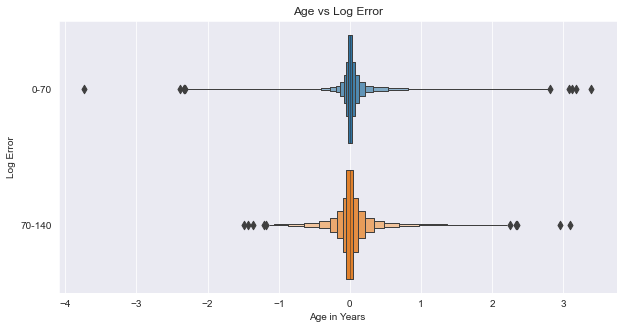

In [22]:
# create a boxenplot of age_bin vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.boxenplot(x='logerror', y=X_train['age_bin'], data=train, linewidth=1)
# lable the plot
plt.xlabel('Age in Years')
plt.ylabel('Log Error')
plt.title('Age vs Log Error')
plt.show()

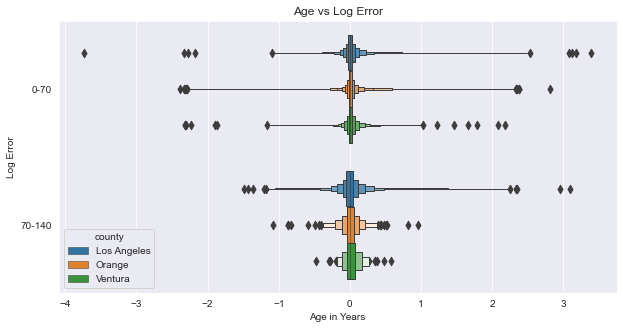

In [23]:
# create a boxenplot of age_bin vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.boxenplot(x='logerror', y=X_train['age_bin'], data=train, linewidth=1, hue='county')
# lable the plot
plt.xlabel('Age in Years')
plt.ylabel('Log Error')
plt.title('Age vs Log Error')
plt.show()

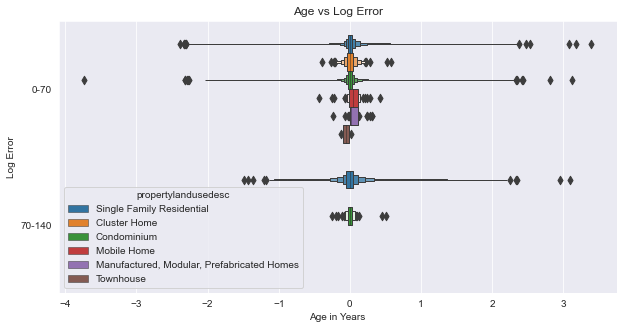

In [24]:
# create a boxenplot of age_bin vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.boxenplot(x='logerror', y=X_train['age_bin'], data=train, linewidth=1, hue='propertylandusedesc')
# lable the plot
plt.xlabel('Age in Years')
plt.ylabel('Log Error')
plt.title('Age vs Log Error')
plt.show()

In [25]:
# Test assumption of equal varianceusing levene's test
stats.levene(train[train.age_in_years <= 70].logerror, train[train.age_in_years > 70].logerror)

LeveneResult(statistic=311.5189584836168, pvalue=1.934960311609117e-69)

In [26]:
# test assumption of unequal variance using ttest, two sampled, two tailed
tt_r, tt_p =stats.ttest_ind(train[train.age_in_years <= 70].logerror, train[train.age_in_years > 70].logerror, equal_var=False)

Conduct hypothesis testing:

 H0: Mean of logerror of homes under 70 years old is the same as homes over 70 years old

 Ha: Mean of logerror of homes under 70 years old is different than homes over 70 years old

In [27]:
alpha = 0.05

if tt_p > 0.05:
    print('Reject the null hypothesis that the two groups have equal means')
else:
    print('Fail to reject the null hypothesis that the two groups have equal means')

Fail to reject the null hypothesis that the two groups have equal means


Take Aways:
- There appears to be two distinct age groups that are correlate with logerror.

<Figure size 288x144 with 0 Axes>

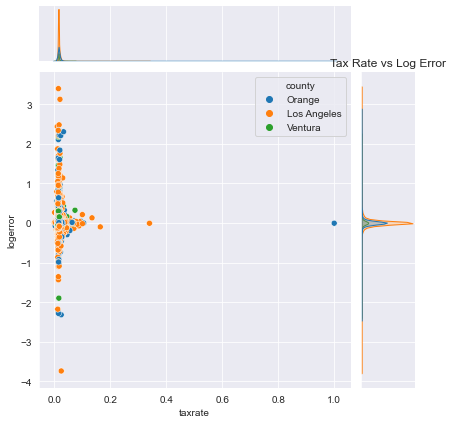

In [28]:
# Is there a relationship between the logerror and tax rate?
# plot taxrate vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['taxrate'], y=y_train['logerror'], data=train, hue='county')
# lable the plot
plt.xlabel('Tax Rate')
plt.ylabel('Log Error')
plt.title('Tax Rate vs Log Error')
plt.show()

<Figure size 720x360 with 0 Axes>

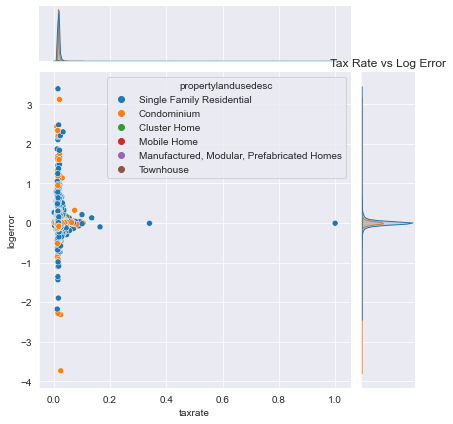

In [29]:
# plot taxrate vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.jointplot(x=X_train_scaled['taxrate'], y=y_train['logerror'], data=train, hue='propertylandusedesc')
# lable the plot
plt.xlabel('Tax Rate')
plt.ylabel('Log Error')
plt.title('Tax Rate vs Log Error')
plt.show()

In [30]:
# conduct pearson's test to compare the correlation between the variables
# due to tax rate and logerror being continuous I used pearson's test
r,p = stats.pearsonr(X_train_scaled['taxrate'], y_train['logerror'])
print(r, p)


0.007171453812372085 0.1627272642124341


H0: There is no relationship between taxrate and logerror

H1: There is a relationship between taxrate and logerror


In [31]:
alpha = 0.05

if p > alpha:
    print('There is not a correlation between tax rate and logerror')
else:
    print('There is a correlation between tax rate and logerror')

There is not a correlation between tax rate and logerror


Take aways:
- There appears to be a relationship between taxrate and logerror.
- The lower the tax rate the right chance of increasing the logerror.
- The higher the tax rate the logerror is less likely to be volitile.

<Figure size 288x144 with 0 Axes>

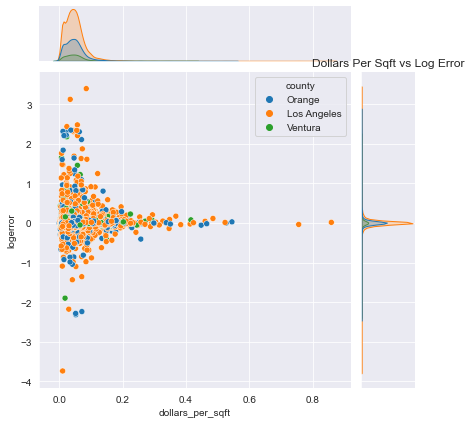

In [32]:
# If we control for dollars_per_sqft, does the logerror differ by location?
# plot dollars_per_sqft vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['dollars_per_sqft'], y=y_train['logerror'], data=train, hue='county')
# lable the plot
plt.xlabel('Dollars Per Sqft')
plt.ylabel('Log Error')
plt.title('Dollars Per Sqft vs Log Error')
plt.show()

In [33]:
r,p = stats.pearsonr(X_train_scaled['dollars_per_sqft'], y_train['logerror'])
print('Pearson\'s r:', r)
print('p-value:', p)

Pearson's r: -0.04621516155386419
p-value: 2.242945014295478e-19


In [34]:
alpha = 0.05

if p > alpha:
    print('There is not a correlation between tax rate and logerror')
else:
    print('There is a correlation between tax rate and logerror')

There is a correlation between tax rate and logerror


Take Away:
- There appears to be a relationship between taxrate and logerror.
- The less you pay per sqft the higher the chance of increasing the logerror.

<Figure size 288x144 with 0 Axes>

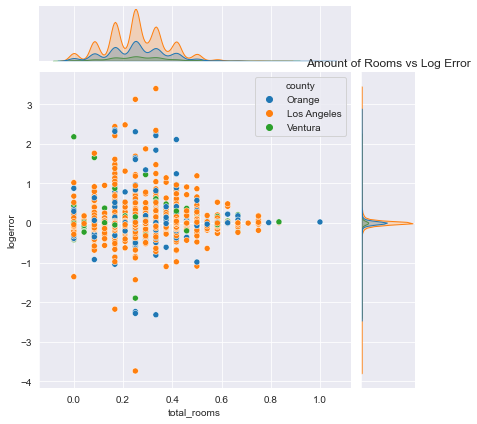

In [35]:
# Is there a relationship between the logerror and amount of rooms?
# plot amount_of_rooms vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['total_rooms'], y=y_train['logerror'], data=train, hue='county')
# lable the plot
plt.xlabel('Amount of Rooms')
plt.ylabel('Log Error')
plt.title('Amount of Rooms vs Log Error')
plt.show()

<Figure size 288x144 with 0 Axes>

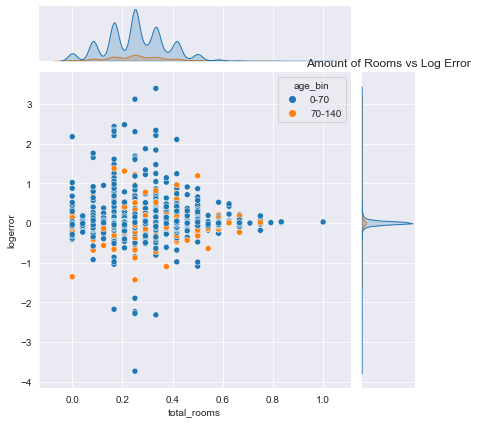

In [36]:
# plot amount_of_rooms vs logerror
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
sns.jointplot(x=X_train_scaled['total_rooms'], y=y_train['logerror'], data=X_train, hue='age_bin')
# lable the plot
plt.xlabel('Amount of Rooms')
plt.ylabel('Log Error')
plt.title('Amount of Rooms vs Log Error')
plt.show()

In [37]:
# run a pearsonr to compare logerror and total_rooms
stats.pearsonr(train.total_rooms, train.logerror)

(0.029586715233269247, 8.392390504593582e-09)

In [38]:
if p > alpha:
    print('There is not a correlation between total_rooms and logerror')
else:
    print('There is a correlation between total_rooms and logerror')

There is a correlation between total_rooms and logerror


Take aways:
- There appears to be a relationship between totalrooms and logerror.
- property under 8 rooms have a higher chance of increasing the logerror.

Cluster Analysis

Identify other probable drivers of logerror

Features: age_in_years, taxrate, total_rooms, and dollars_per_sqft

In [39]:
# X is the features you want to use to cluster
X1 = X_train_scaled[['age_in_years', 'dollars_per_sqft']]
X2 = X_validate_scaled[['age_in_years', 'dollars_per_sqft']]
X3 = X_test_scaled[['age_in_years', 'dollars_per_sqft']]

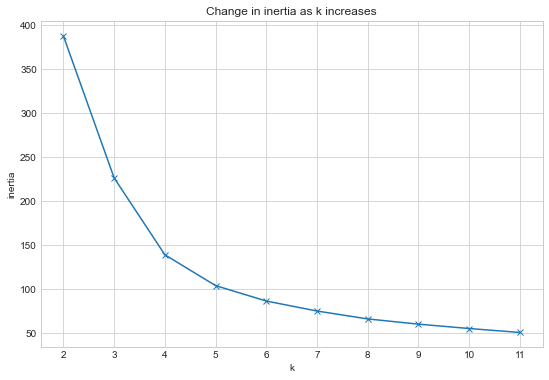

In [40]:
# Check the inertia of the KMeans model
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [41]:
# KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=789)
kmeans.fit(X1)
kmeans.fit(X2)
kmeans.fit(X3)


kmeans.predict(X1)
kmeans.predict(X2)
kmeans.predict(X3)


array([2, 2, 2, ..., 0, 0, 1], dtype=int32)

In [42]:
# Add a column to the scaled dataframe called cluster
X_train_scaled['cluster1'] = kmeans.predict(X1)
X_validate_scaled['cluster1'] = kmeans.predict(X2)
X_test_scaled['cluster1'] = kmeans.predict(X3)

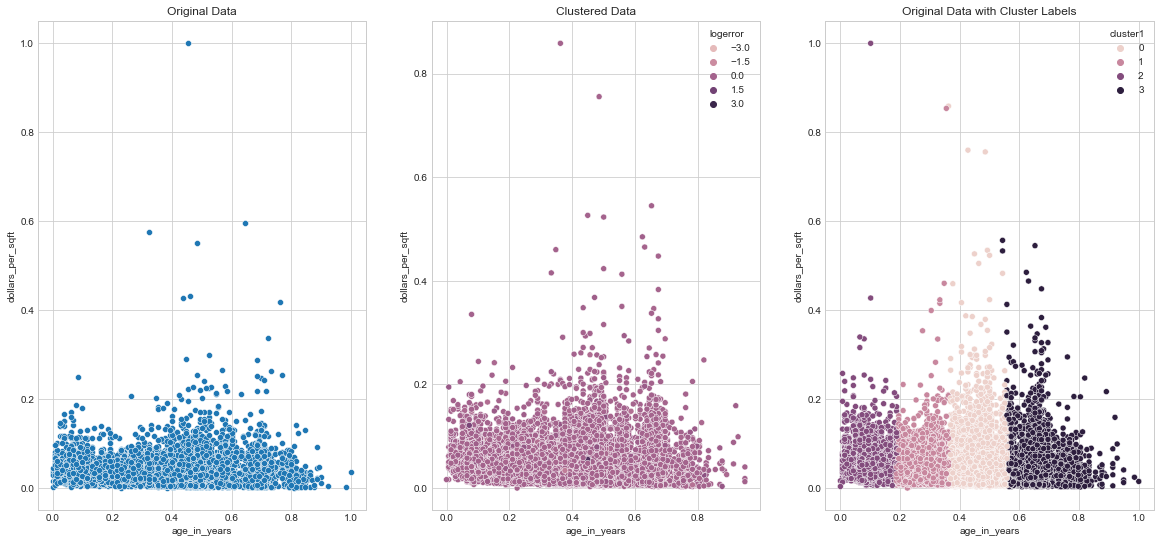

In [43]:
# create three subplots with original data, actual, and cluster assignments
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='age_in_years', y='dollars_per_sqft', data=X_test_scaled)
    plt.title('Original Data')
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=X_train_scaled['age_in_years'], y=X_train_scaled['dollars_per_sqft'], hue=y_train['logerror'])
    plt.title('Clustered Data')
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='age_in_years', y='dollars_per_sqft', hue='cluster1', data=X_train_scaled)
    plt.title('Original Data with Cluster Labels')

In [44]:
def cluster(df, feature1, feature2, k):
    X = df[[feature1, feature2]]

    kmeans = KMeans(n_clusters=k).fit(X)
    
    df['clusterx'] = kmeans.predict(X)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    
    plt.figure(figsize=(14, 9))
    
    for cluster, subset in df.groupby('clusterx'):
        plt.scatter(subset[feature2], subset[feature1], label='cluster' + str(cluster), alpha=.6)
    
    centroids.plot.scatter(y=feature1, x=feature2, c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')
    
    plt.legend()
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Visualizing Cluster Centers')

Take Aways:
- Four distinct tax rates groups
- normal distribution for taxrate

In [45]:
X1 = X_train_scaled[['total_rooms', 'calculatedfinishedsquarefeet']]
X2 = X_validate_scaled[['total_rooms', 'calculatedfinishedsquarefeet']]
X3 = X_test_scaled[['total_rooms', 'calculatedfinishedsquarefeet']]

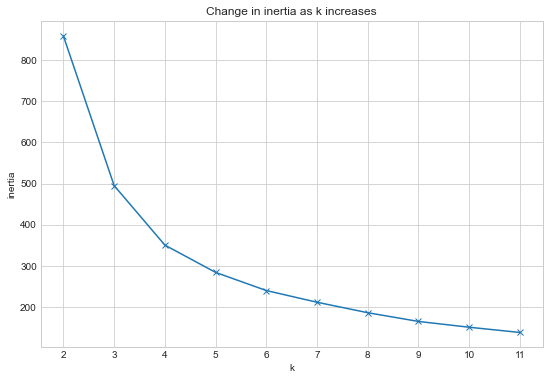

In [46]:
# Check the inertia of the KMeans model
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [47]:
# KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=789)
kmeans.fit(X1)
kmeans.fit(X2)
kmeans.fit(X3)

kmeans.predict(X1)
kmeans.predict(X2)
kmeans.predict(X3)


array([1, 1, 2, ..., 1, 3, 1], dtype=int32)

In [48]:
# Add a column to the dataframe called cluster
X_train_scaled['cluster2'] = kmeans.predict(X1)
X_validate_scaled['cluster2'] = kmeans.predict(X2)
X_test_scaled['cluster2'] = kmeans.predict(X3)

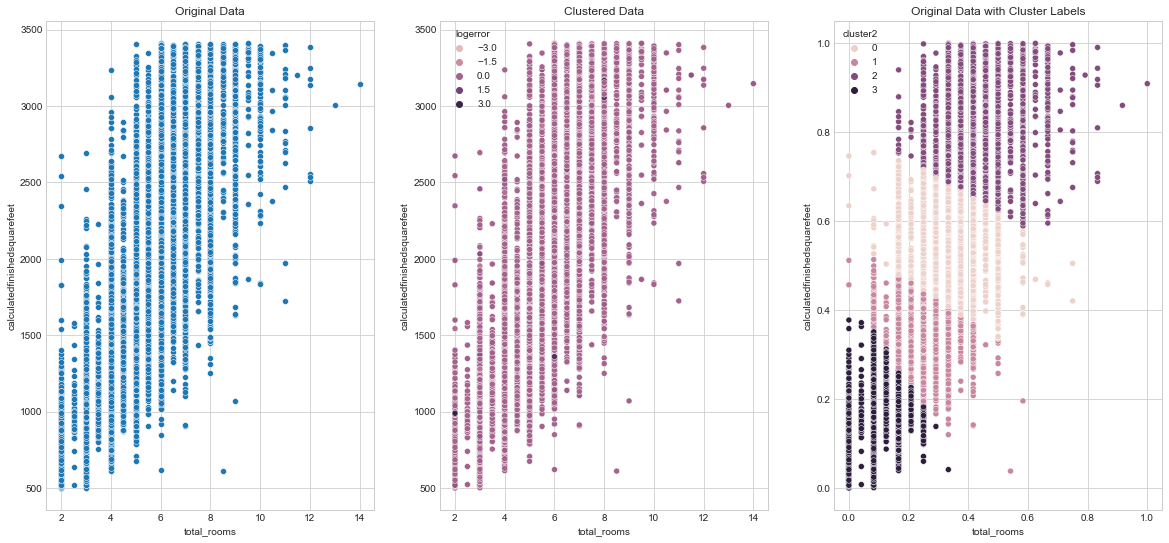

In [49]:
# create three subplots with original data, actual, and cluster assignments
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='total_rooms', y='calculatedfinishedsquarefeet', data=X_train)
    plt.title('Original Data')
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='total_rooms', y='calculatedfinishedsquarefeet', hue='logerror', data=train)
    plt.title('Clustered Data')
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='total_rooms', y='calculatedfinishedsquarefeet', hue='cluster2', data=X_train_scaled)
    plt.title('Original Data with Cluster Labels')

Take aways:
- Three distinct groups for dollars_per_sqft
- Total rooms appears to decrease as the cost per sqft increases.

In [161]:
X1 = X_train_scaled[['age_in_years', 'total_rooms']]
X2 = X_validate_scaled[['age_in_years', 'total_rooms']]
X3 = X_test_scaled[['age_in_years', 'total_rooms']]


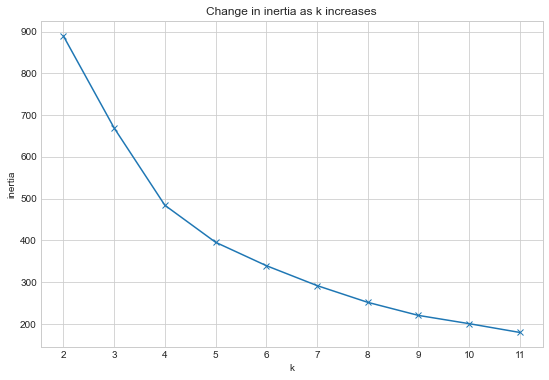

In [162]:
# Check the inertia of the KMeans model
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [163]:
# KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=789)
kmeans.fit(X1)
kmeans.fit(X2)
kmeans.fit(X3)

kmeans.predict(X1)
kmeans.predict(X2)
kmeans.predict(X3)

array([1, 1, 1, ..., 2, 2, 3], dtype=int32)

In [164]:
X_train_scaled['cluster3'] = kmeans.predict(X1)
X_validate_scaled['cluster3'] = kmeans.predict(X2)
X_test_scaled['cluster3'] = kmeans.predict(X3)


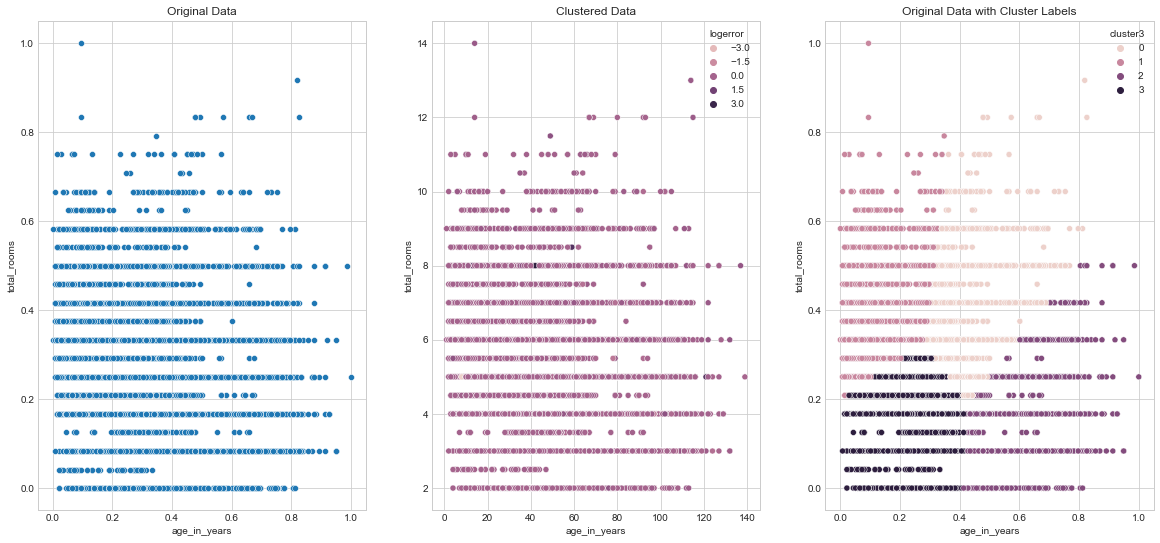

In [165]:
# create three subplots with original data, actual, and cluster assignments
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='age_in_years', y='total_rooms', data=X_train_scaled)
    plt.title('Original Data')
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='age_in_years', y='total_rooms', hue='logerror', data=train)
    plt.title('Clustered Data')
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='age_in_years', y='total_rooms', hue='cluster3', data=X_train_scaled)
    plt.title('Original Data with Cluster Labels')

In [166]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,yearbuilt,structuretaxvaluedollarcnt,...,sqft_per_bed,sqft_per_bath,total_rooms,bed_bath_rooms_per_sqft,age_in_years,taxrate,dollars_per_sqft,cluster1,cluster2,cluster3
0,0.153846,0.25,0.409763,0.166667,0.268223,0.607228,0.000798,0.000000,0.528986,0.043796,...,0.132717,0.250016,0.250000,0.167808,0.471014,0.014663,0.068300,0,1,0
1,0.230769,0.25,0.418013,0.166667,0.162356,0.922952,0.000462,0.000000,0.811594,0.070695,...,0.135314,0.197817,0.291667,0.186828,0.188406,0.006916,0.033837,1,1,1
2,0.153846,0.25,0.259883,0.166667,0.471519,0.806407,0.000821,0.000000,0.565217,0.014384,...,0.085538,0.178761,0.250000,0.245764,0.434783,0.020983,0.007908,0,1,0
3,0.153846,0.25,0.210038,0.166667,0.337070,0.761166,0.000798,0.500000,0.557971,0.011756,...,0.069848,0.155063,0.250000,0.285235,0.442029,0.020662,0.009489,0,1,0
4,0.076923,0.25,0.348230,0.000000,0.649220,0.326613,0.000125,0.416667,0.739130,0.032308,...,0.113347,0.303240,0.208333,0.169248,0.260870,0.000685,0.018666,1,1,3


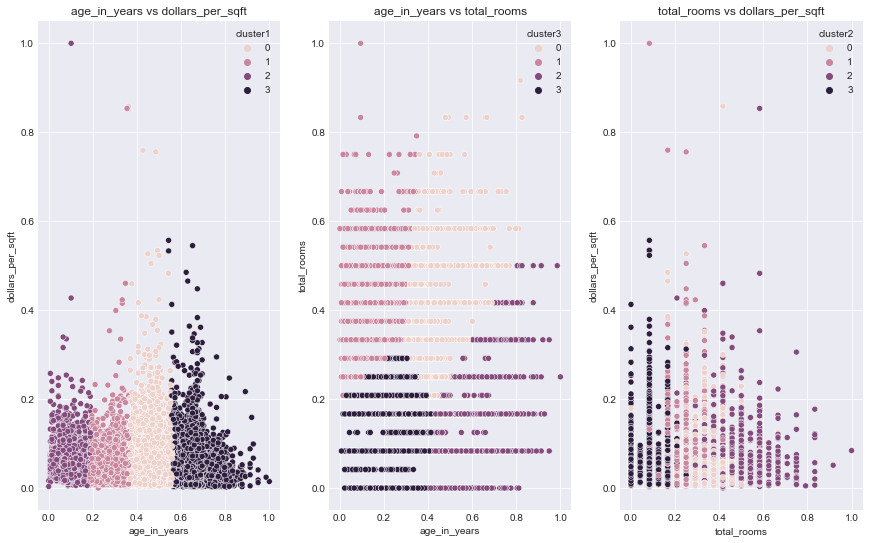

In [167]:

# create three subplots with original data, actual, and cluster assignments
with plt.style.context('seaborn-darkgrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 4, 1)
    sns.scatterplot(x='age_in_years', y='dollars_per_sqft', hue='cluster1', data=X_train_scaled)
    plt.title('age_in_years vs dollars_per_sqft')
    plt.subplot(1, 4, 2)
    sns.scatterplot(x='age_in_years', y='total_rooms', hue='cluster3', data=X_train_scaled)
    plt.title('age_in_years vs total_rooms')
    plt.subplot(1, 4, 3)
    sns.scatterplot(x='total_rooms', y='dollars_per_sqft', hue='cluster2', data=X_train_scaled)
    plt.title('total_rooms vs dollars_per_sqft')

Cluster Hyphothesis testing

    H0: There is no relationship between cluster1 and logerror
    H1: There is a relationship between cluster1 and logerror

In [168]:
# run pearsonr test to check if there is a correlation between the two variables
r, p = stats.pearsonr(X_train_scaled['cluster1'], y_train['logerror'])
print(r,p)

-0.01620435381529409 0.001608168646185401


In [169]:
if p < 0.05:
    print('There is a relationship between cluster1 and logerror')
else:
    print('There is no relationship between cluster1 and logerror')

There is a relationship between cluster1 and logerror


H0: There is no relationship between cluster2 and logerror

Ha: There is a relationship between cluster2 and logerror

In [170]:
# run pearsonr test to check if there is a correlation between the two variables
r, p = stats.pearsonr(X_train_scaled['cluster2'], y_train['logerror'])
print(r,p)

-0.011874062522493494 0.02081107386917302


In [171]:
if p < 0.05:
    print('There is a relationship between cluster2 and logerror')
else:
    print('There is no relationship between cluster2 and logerror')

There is a relationship between cluster2 and logerror


H0: There is no relationship between cluster3 and logerror

Ha: There is a relationship between cluster3 and logerror

In [172]:
# run pearsonr test to check if there is a correlation between the two variables
r, p = stats.pearsonr(X_train_scaled['cluster3'], y_train['logerror'])
print(r,p)

-0.020940640340158273 4.5701009154307285e-05


In [173]:
if p < 0.05:
    print('There is a relationship between cluster3 and logerror')
else:
    print('There is no relationship between cluster3 and logerror')

There is a relationship between cluster3 and logerror


Modeling

In [175]:
# set logerror baseline for modeling
baseline = y_train['logerror'].mean()
baseline

0.014528110960473068

In [176]:
# create a column in the dataframe called baseline
y_train['baseline'] = baseline
y_train

,logerror,baseline,logerror_pred1,logerror_pred2,logerror_pred_lm
54817,0.055703,0.014528,0.012770,0.014528,0.003609
43209,0.002471,0.014528,0.018452,0.014528,0.013075
35463,-0.056099,0.014528,0.023283,0.014528,0.030847
51049,0.013502,0.014528,0.022462,0.014528,0.032039
25605,0.196236,0.014528,0.019052,0.014528,0.013655
...,...,...,...,...,...
15769,-0.036533,0.014528,0.007580,0.014528,0.006957
46334,-0.004131,0.014528,0.016826,0.014528,0.014116
46361,0.021442,0.014528,0.018971,0.014528,0.016097
58395,0.036958,0.014528,0.009439,0.014528,0.009137


In [177]:
from sklearn.metrics import mean_squared_error

# calculate to RMSE for the baseline
train_baseline_rmse = np.sqrt(mean_squared_error(y_train.logerror, y_train['baseline']))


In [178]:
# predict validate data set
y_validate['baseline'] = baseline
validate_baseline_rmse = np.sqrt(mean_squared_error(y_validate.logerror, y_validate['baseline']))

In [179]:
# create a dataframe to visualize the results
results = pd.DataFrame(data=[{'model': 'baseline_mean', 'train_rmse': train_baseline_rmse, 'validate_rmse': validate_baseline_rmse}])
results

,model,train_rmse,validate_rmse
0,baseline_mean,0.161223,0.15916


In [180]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,transactiondate,propertylandusedesc,county,sqft_per_bed,sqft_per_bath,total_rooms,bed_bath_rooms_per_sqft,age_in_years,taxrate,dollars_per_sqft
54817,202328,12699305,2.0,3.0,1693.0,6037.0,2.0,33734912.0,-118309453.0,6000.0,...,2017-07-07,Single Family Residential,Los Angeles,564.333333,846.500000,5.0,0.002953,66.0,0.012112,371.529829
43209,728418,14394382,2.5,3.0,1717.0,6059.0,2.0,33579286.0,-117703297.0,3655.0,...,2017-06-05,Single Family Residential,Orange,572.333333,686.800000,5.5,0.003203,27.0,0.005788,184.216075
35463,189132,13096464,2.0,3.0,1257.0,6037.0,2.0,34033762.0,-117927051.0,6156.0,...,2017-05-12,Single Family Residential,Los Angeles,419.000000,628.500000,5.0,0.003978,61.0,0.017271,43.284010
51049,2724396,13905119,2.0,3.0,1112.0,6059.0,2.0,33836119.0,-118013909.0,6000.0,...,2017-06-28,Single Family Residential,Orange,370.666667,556.000000,5.0,0.004496,62.0,0.017008,51.878597
25605,1447480,17206195,1.5,3.0,1514.0,6111.0,1.0,34294985.0,-118848204.0,1306.0,...,2017-04-12,Cluster Home,Ventura,504.666667,1009.333333,4.5,0.002972,37.0,0.000700,101.760238


In [251]:
# select features to use for modeling
features = ['age_in_years', 'total_rooms', 'dollars_per_sqft', 'cluster2', 'cluster3']
unscaled_features = ['age_in_years', 'total_rooms', 'dollars_per_sqft']


Model 1: Linear Regression (OLS)

In [252]:
# import the model
from sklearn.linear_model import LinearRegression
# create the model
model1 = LinearRegression(normalize=True)
# fit the model
model1.fit(X_train_scaled[features], y_train.logerror)

LinearRegression(normalize=True)

In [253]:
# predict training data
y_train['logerror_pred1']= model1.predict(X_train_scaled[features])
# evaluate train
train_rmse = np.sqrt(mean_squared_error(y_train.logerror, y_train['logerror_pred1']))
# predict validate data set
y_validate['logerror_pred1']= model1.predict(X_validate_scaled[features])
# evaluate validate
validate_rmse = np.sqrt(mean_squared_error(y_validate.logerror, y_validate['logerror_pred1']))


In [254]:
results = results.append({'model': 'linear_regression', 'train_rmse': train_rmse, 'validate_rmse': validate_rmse}, ignore_index=True)
results

,model,train_rmse,validate_rmse
0,baseline_mean,0.161223,0.159160
1,linear_regression,0.160979,0.159048
2,lasso_lars,0.161223,0.159160
3,polynomial_regression,0.160254,0.159236
4,unscaled lasso_lars,0.161223,0.159160
5,linear_regression,0.160976,0.159042
6,lasso_lars,0.161223,0.159160
7,polynomial_regression,0.160141,0.159407
8,unscaled lasso_lars,0.161223,0.159160
9,linear_regression,0.160979,0.159048


Model 2: Lasso + Lars

In [255]:
# import lasso lars model
from sklearn.linear_model import LassoLars
# create the model
model2 = LassoLars(alpha=2)
# fit the model
model2.fit(X_train_scaled[features], y_train.logerror)
# predict training data
y_train['logerror_pred2']= model2.predict(X_train_scaled[features])
# evaluate train
train_rmse = np.sqrt(mean_squared_error(y_train.logerror, y_train['logerror_pred2']))
# predict validate data set
y_validate['logerror_pred2']= model2.predict(X_validate_scaled[features])
# evaluate validate
validate_rmse = np.sqrt(mean_squared_error(y_validate.logerror, y_validate['logerror_pred2']))


In [256]:
# create a dataframe to visualize the results
results = results.append({'model': 'lasso_lars', 'train_rmse': train_rmse, 'validate_rmse': validate_rmse}, ignore_index=True)
results

,model,train_rmse,validate_rmse
0,baseline_mean,0.161223,0.159160
1,linear_regression,0.160979,0.159048
2,lasso_lars,0.161223,0.159160
3,polynomial_regression,0.160254,0.159236
4,unscaled lasso_lars,0.161223,0.159160
5,linear_regression,0.160976,0.159042
6,lasso_lars,0.161223,0.159160
7,polynomial_regression,0.160141,0.159407
8,unscaled lasso_lars,0.161223,0.159160
9,linear_regression,0.160979,0.159048


model 3: polynomial features


In [257]:
# make a polynomial feature to get new features
from sklearn.preprocessing import PolynomialFeatures
# create the model
model3 = PolynomialFeatures(degree=3)
# fit and transform the model for train
X_train_poly = model3.fit_transform(X_train_scaled[features])
# fit and transform the model for validate
X_validate_poly = model3.fit_transform(X_validate_scaled[features])

In [258]:
# create a linear regression model
lm = LinearRegression(normalize=True)
# fit the model
lm.fit(X_train_poly, y_train.logerror)
# use the model
y_train['logerror_pred_lm']= lm.predict(X_train_poly)
# evaluate rmse for train
model3_rmse_train = np.sqrt(mean_squared_error(y_train.logerror, y_train['logerror_pred_lm']))
# predict validate data set
y_validate['logerror_pred_lm']= lm.predict(X_validate_poly)
# evaluate rmse for validate
model3_rmse_validate = np.sqrt(mean_squared_error(y_validate.logerror, y_validate['logerror_pred_lm']))

In [259]:
# create a dataframe to visualize the results
results = results.append({'model': 'polynomial_regression', 'train_rmse': model3_rmse_train, 'validate_rmse': model3_rmse_validate}, ignore_index=True)

model4 = Unscaled Lasso + Lars no clusters

In [260]:
# import lasso lars model
from sklearn.linear_model import LassoLars
# create the model
model2 = LassoLars(alpha=2)
# fit the model
model2.fit(X_train[unscaled_features], y_train.logerror)
# predict training data
y_train['logerror_pred2']= model2.predict(X_train[unscaled_features])
# evaluate train
train_rmse = np.sqrt(mean_squared_error(y_train.logerror, y_train['logerror_pred2']))
# predict validate data set
y_validate['logerror_pred2']= model2.predict(X_validate[unscaled_features])
# evaluate validate
validate_rmse = np.sqrt(mean_squared_error(y_validate.logerror, y_validate['logerror_pred2']))


In [261]:
# create a dataframe to visualize the results
results = results.append({'model': 'unscaled lasso_lars', 'train_rmse': train_rmse, 'validate_rmse': validate_rmse}, ignore_index=True)

In [262]:
results

,model,train_rmse,validate_rmse
0,baseline_mean,0.161223,0.159160
1,linear_regression,0.160979,0.159048
2,lasso_lars,0.161223,0.159160
3,polynomial_regression,0.160254,0.159236
4,unscaled lasso_lars,0.161223,0.159160
5,linear_regression,0.160976,0.159042
6,lasso_lars,0.161223,0.159160
7,polynomial_regression,0.160141,0.159407
8,unscaled lasso_lars,0.161223,0.159160
9,linear_regression,0.160979,0.159048


In [263]:
# Use the best model on test set
X_test_poly = X_test_scaled[features]
X_test_3 = model3.transform(X_test_poly)
# predict test data
y_test['poly_pred_lm']= lm.predict(X_test_3)
# evaluate rmse for test
poly_rmse_test = np.sqrt(mean_squared_error(y_test.logerror, y_test['poly_pred_lm']))
poly_rmse_test

0.16108080471294595

In [264]:
# percentage of test data that is predicted correctly
percent_improved = (train_baseline_rmse - poly_rmse_test) / train_baseline_rmse * 100
percent_improved

0.08813295208501105

Take Aways:
-  Test model was .09% better than the basemodel.
-  Polynomial features were used to increase the accuracy of the model.